Csomagok importálása

In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from tslearn.metrics import dtw
import matplotlib.pyplot as plt

c:\Users\mulle\AppData\Local\Programs\Python\Python312\Lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


Adatok beolvasása

In [3]:
# Fájl elérési útvonala
file_path = r'D:\Tibi\Egyetem\Msc\Tárgyak\Mély gépi tanulás - NSXMG1HMLFMG1\predictions_with_lags_test_1217.csv'
file_path2 = r'D:\Tibi\Egyetem\Msc\Tárgyak\Mély gépi tanulás - NSXMG1HMLFMG1\predictions_with_lags_test_final_tuning.csv'
file_path3 = r'D:\Tibi\Egyetem\Msc\Tárgyak\Mély gépi tanulás - NSXMG1HMLFMG1\GOOG_stock_data_with_predictions_{rolling_predictions_with_10_day_skip_using_last_10_train_data_only_df} teszthez.xlsx'

# CSV fájl beolvasása DataFrame-be
df = pd.read_csv(file_path)
df2 = pd.read_csv(file_path2)
df3 = pd.read_excel(file_path3, usecols="A:C")

# Az első néhány sor megjelenítése
print(df.head())
print(df2.head())
print(df3.head())

# Csak azokat a sorokat használjuk, ahol nincs NaN
df_clean = df.dropna(subset=['Truth', 'Prediction_1_Days_Ago'])
df_clean2 = df2.dropna(subset=['Truth', 'Prediction_1_Days_Ago'])
df_clean3 = df3.dropna(subset=['Truth', 'Prediction_1_Days_Ago'])

         Date       Truth  Prediction_1_Days_Ago
0  2025-01-29  196.955612                    NaN
1  2025-01-30  202.399414              193.33913
2  2025-01-31  205.366043              193.58218
3  2025-02-03  202.409393              197.72932
4  2025-02-04  207.473633              200.17413
         Date       Truth  Prediction_1_Days_Ago
0  2025-01-29  196.955612                    NaN
1  2025-01-30  202.399414              189.89806
2  2025-01-31  205.366043              190.22945
3  2025-02-03  202.409393              192.31645
4  2025-02-04  207.473633              194.27077
        Date       Truth  Prediction_1_Days_Ago
0 2025-01-29  196.955612                    NaN
1 2025-01-30  202.399414             196.196999
2 2025-01-31  205.366043             199.646756
3 2025-02-03  202.409393             205.366043
4 2025-02-04  207.473633             202.409393


RMSE számítása

In [4]:
# RMSE számítása mindhárom predikcióra
rmse_1_day = np.sqrt(mean_squared_error(df_clean['Truth'], df_clean['Prediction_1_Days_Ago']))
rmse_1_day2 = np.sqrt(mean_squared_error(df_clean2['Truth'], df_clean2['Prediction_1_Days_Ago']))
rmse_1_day3 = np.sqrt(mean_squared_error(df_clean3['Truth'], df_clean3['Prediction_1_Days_Ago']))

# Eredmények kiírása
print(f'LSTM - RMSE for Prediction 1 Day Ago: {rmse_1_day:.4f}')
print(f'LSTM (tuning) - RMSE for Prediction 1 Day Ago: {rmse_1_day2:.4f}')
print(f'ARIMA - RMSE for Prediction 1 Day Ago: {rmse_1_day3:.4f}')

LSTM - RMSE for Prediction 1 Day Ago: 5.6217
LSTM (tuning) - RMSE for Prediction 1 Day Ago: 5.8223
ARIMA - RMSE for Prediction 1 Day Ago: 4.8478


MAE számítása

In [5]:
# MAE számítása
mae_1_day = mean_absolute_error(df_clean['Truth'], df_clean['Prediction_1_Days_Ago'])
mae_1_day2 = mean_absolute_error(df_clean2['Truth'], df_clean2['Prediction_1_Days_Ago'])
mae_1_day3 = mean_absolute_error(df_clean3['Truth'], df_clean3['Prediction_1_Days_Ago'])

# Eredmények kiírása
print(f'LSTM - MAE for Prediction 1 Day Ago: {mae_1_day:.4f}')
print(f'LSTM (tuning) - MAE for Prediction 1 Day Ago: {mae_1_day2:.4f}')
print(f'ARIMA - MAE for Prediction 1 Day Ago: {mae_1_day3:.4f}')

LSTM - MAE for Prediction 1 Day Ago: 4.5476
LSTM (tuning) - MAE for Prediction 1 Day Ago: 4.5110
ARIMA - MAE for Prediction 1 Day Ago: 3.8744


R² Score számítása

In [6]:
# R² Score számítása
r2_1_day = r2_score(df_clean['Truth'], df_clean['Prediction_1_Days_Ago'])
r2_1_day2 = r2_score(df_clean2['Truth'], df_clean2['Prediction_1_Days_Ago'])
r2_1_day3 = r2_score(df_clean3['Truth'], df_clean3['Prediction_1_Days_Ago'])

# Eredmények kiírása
print(f'LSTM - R² Score for Prediction 1 Day Ago: {r2_1_day:.4f}')
print(f'LSTM (tuning) - R² Score for Prediction 1 Day Ago: {r2_1_day2:.4f}')
print(f'ARIMA - R² Score for Prediction 1 Day Ago: {r2_1_day3:.4f}')


LSTM - R² Score for Prediction 1 Day Ago: 0.8578
LSTM (tuning) - R² Score for Prediction 1 Day Ago: 0.8475
ARIMA - R² Score for Prediction 1 Day Ago: 0.8970


DTW számítás

In [7]:
# DTW távolság számítása
x = df_clean['Truth'].to_numpy().reshape(-1, 1)  # Mivel a tslearn 2D inputot vár (n_timestamps, 1)
y_1_day = df_clean['Prediction_1_Days_Ago'].to_numpy().reshape(-1, 1)
x2 = df_clean2['Truth'].to_numpy().reshape(-1, 1)  # Mivel a tslearn 2D inputot vár (n_timestamps, 1)
y_1_day2 = df_clean2['Prediction_1_Days_Ago'].to_numpy().reshape(-1, 1)
x3 = df_clean3['Truth'].to_numpy().reshape(-1, 1)  # Mivel a tslearn 2D inputot vár (n_timestamps, 1)
y_1_day3 = df_clean3['Prediction_1_Days_Ago'].to_numpy().reshape(-1, 1)

# DTW távolságok számítása
dtw_1_day = dtw(x, y_1_day)
dtw_1_day2 = dtw(x2, y_1_day2)
dtw_1_day3 = dtw(x3, y_1_day3)

# Eredmények kiírása
print(f'LSTM - DTW distance for Prediction 1 Day Ago: {dtw_1_day:.4f}')
print(f'LSTM (tuning) - DTW distance for Prediction 1 Day Ago: {dtw_1_day2:.4f}')
print(f'ARIMA - DTW distance for Prediction 1 Day Ago: {dtw_1_day3:.4f}')

LSTM - DTW distance for Prediction 1 Day Ago: 21.2933
LSTM (tuning) - DTW distance for Prediction 1 Day Ago: 29.3873
ARIMA - DTW distance for Prediction 1 Day Ago: 12.4761


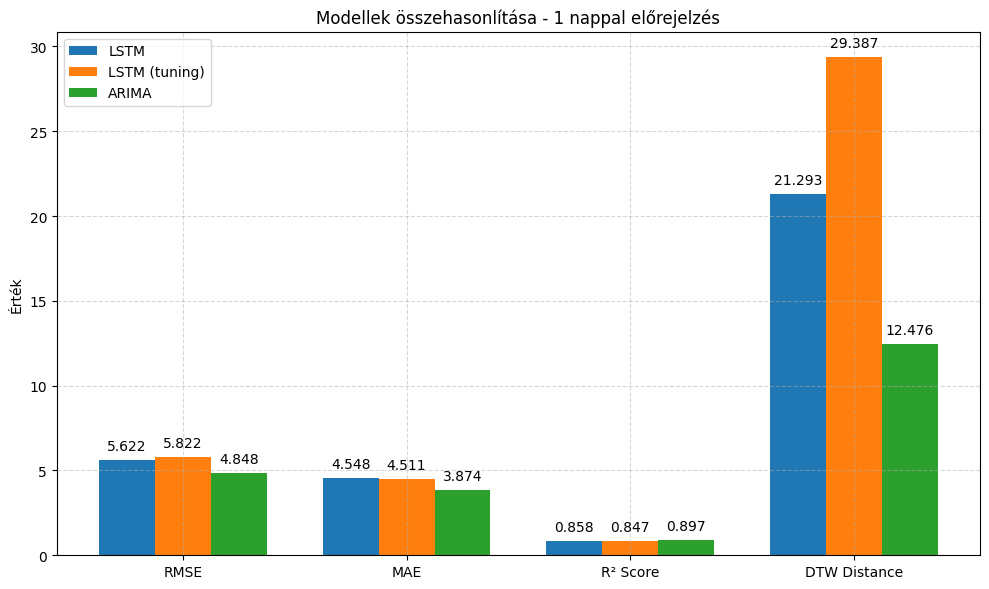

In [11]:
# Metrikák és modellek
metrics = ['RMSE', 'MAE', 'R² Score', 'DTW Distance']
lstm_scores = [rmse_1_day, mae_1_day, r2_1_day, dtw_1_day]
lstm_tuned_scores = [rmse_1_day2, mae_1_day2, r2_1_day2, dtw_1_day2]
arima_scores = [rmse_1_day3, mae_1_day3, r2_1_day3, dtw_1_day3]

x = np.arange(len(metrics))  # a tengely pozíciók
width = 0.25  # oszlopok szélessége

# Ábra létrehozása
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, lstm_scores, width, label='LSTM')
rects2 = ax.bar(x, lstm_tuned_scores, width, label='LSTM (tuning)')
rects3 = ax.bar(x + width, arima_scores, width, label='ARIMA')

# Címkék és beállítások
ax.set_ylabel('Érték')
ax.set_title('Modellek összehasonlítása - 1 nappal előrejelzés')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

# Értékek megjelenítése az oszlopok tetején
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()
